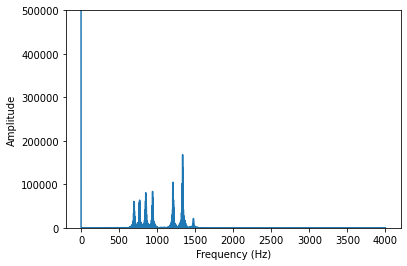

In [1]:
import scipy.io.wavfile as wavfile
import scipy
import scipy.fftpack as fftpk
import scipy.fft as fft
import numpy as np
from matplotlib import pyplot as plt

fs, x = wavfile.read("../data/dtmf_110_7_495_728_5000.wav") 
FFT = np.abs(fft.fft(x))
freqs = fftpk.fftfreq(len(FFT), (1.0/fs))

plt.plot(freqs[range(len(FFT)//2)], FFT[range(len(FFT)//2)])                                                          
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.ylim(0,500000)
plt.show()

In [2]:
import sounddevice as sd
sd.play(x, fs)

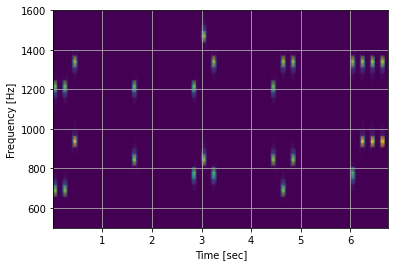

In [47]:
f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(500,1600)
plt.grid()
plt.show()

In [17]:
# import required modules
import numpy as np
  
# assign data
x = np.array([1, 2, 1, 0, 1, 2, 1, 0])
  
# compute DFT with optimized FFT
w = np.fft.fft(x)
  
# compute frequency associated
# with coefficients
freqs = np.fft.fftfreq(len(x))
  
# extract frequencies associated with FFT values
for coef, freq in zip(w, freqs):
    if coef:
        print('{c:>6} * exp(2 pi i t * {f})'.format(c=coef,
                                                    f=freq))

(8+0j) * exp(2 pi i t * 0.0)
   -4j * exp(2 pi i t * 0.25)
    4j * exp(2 pi i t * -0.25)


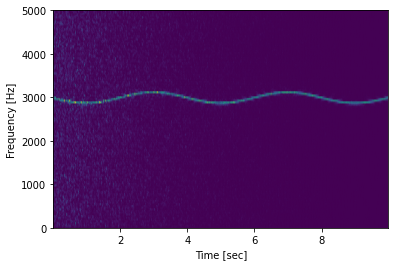

In [39]:
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

rng = np.random.default_rng()
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = rng.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise
f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()